<a href="https://colab.research.google.com/github/Tilak-Shenoy/IE517/blob/Draft/IE517_F2x_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import datasets

In [ ]:
iris = datasets.load_iris()
X_iris, y_iris = iris.data, iris.target

In [ ]:
X,y = X_iris[:,:2], y_iris

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 33)
print(X_train.shape, y_train.shape)

(112, 2) (112,)


In [ ]:
print(X_test.shape, y_test.shape)

(38, 2) (38,)


In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Text(0, 0.5, 'Sepal Width')

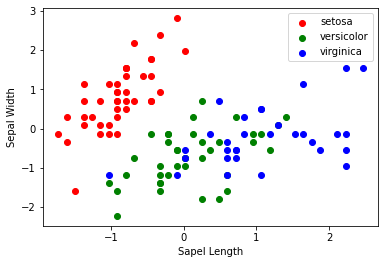

In [ ]:
import matplotlib.pyplot as plt
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
  xs = X_train[:, 0][y_train == i]
  ys = X_train[:,1][y_train == i]
  plt.scatter(xs, ys, c=colors[i])
plt.legend(iris.target_names)
plt.xlabel('Sapel Length')
plt.ylabel('Sepal Width')

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
y = df.iloc[0:400, 4].values
y = np.where(y == 'Iris-setosa',-1,1)

X = df.iloc[0:100, [0,2]].values

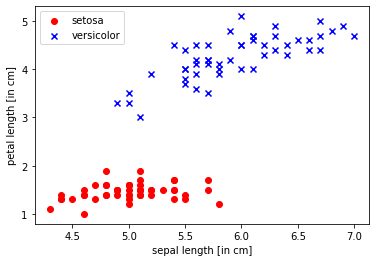

In [ ]:
plt.scatter(X[:50,0], X[:50,1], color = 'red', marker = 'o',label= 'setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color= 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [in cm]')
plt.ylabel('petal length [in cm]')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter = 10000)
clf.fit(X_train, y_train)

SGDClassifier(max_iter=10000)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(clf.coef_)

[[-27.23235041  14.41587601]
 [ -0.56257174  -4.20572187]
 [  3.92638259  -4.17968919]]


In [ ]:
print(clf.intercept_)

[-13.96505366  -0.48859229  -5.18755293]


In [ ]:
x_min, x_max = X_train[:,0].min() - 0.5, X_train[:,0].max() + 0.5
y_min, y_max = X_train[:,1].min() - .5, X_train[:,1].max() + .5

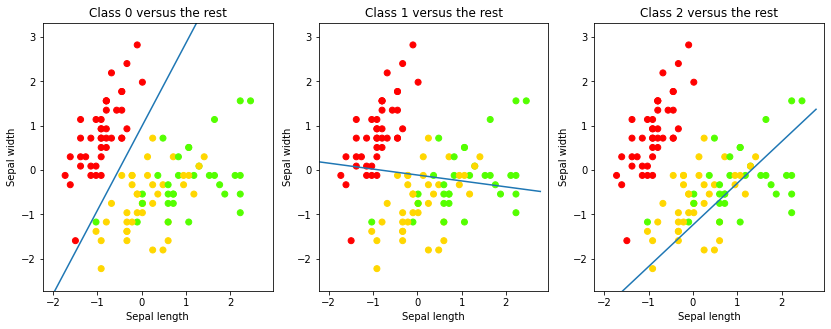

In [ ]:
xs = np.arange(x_min, x_max, 0.5)
fig, axes = plt.subplots(1, 3)
fig.set_size_inches(14, 6)
for i in [0, 1, 2]:
    axes[i].set_aspect('equal')
    axes[i].set_title('Class '+ str(i) + ' versus the rest')
    axes[i].set_xlabel('Sepal length')
    axes[i].set_ylabel('Sepal width')
    axes[i].set_xlim(x_min, x_max)
    axes[i].set_ylim(y_min, y_max)
    #error here need plt.
    plt.sca(axes[i])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.prism)
    ys = (-clf.intercept_[i] - xs * clf.coef_[i, 0]) / clf.coef_[i, 1]
    plt.plot(xs, ys)

In [77]:
from google.colab import files
data_to_load = files.upload()

Saving Treasury Squeeze raw score data.csv to Treasury Squeeze raw score data.csv


In [79]:
treasury_df = pd.read_csv('Treasury Squeeze raw score data.csv')

In [81]:
treasury_df.head()

,rowindex,contract,price_crossing,price_distortion,roll_start,roll_heart,near_minus_next,ctd_last_first,ctd1_percent,delivery_cost,delivery_ratio,squeeze
0,1,TUZ92 Comdty,0.157659,0.900783,0.016053,1.000000,1.000000,0.902811,1.000000,0.010743,0.099313,True
1,2,TUH93 Comdty,0.018588,1.000000,1.000000,0.084724,0.778847,1.000000,0.136069,0.154116,1.000000,False
2,3,TUM93 Comdty,0.035755,0.045987,0.673543,1.000000,0.027689,0.067889,0.007696,0.034743,0.171676,False
3,4,TUU93 Comdty,0.663832,1.000000,0.063057,0.188899,0.064454,0.005742,0.166102,0.956668,1.000000,True
4,5,TUZ93 Comdty,0.109678,0.113601,0.726244,1.000000,1.000000,1.000000,1.000000,0.105467,0.145025,False


In [92]:
y = treasury_df.iloc[:, -1].values

X = treasury_df.iloc[:, 2:11].values

In [93]:
y.shape

(900,)

In [94]:
X.shape

(900, 9)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 33)

In [132]:
clf_treasury = SGDClassifier(max_iter = 10000)
clf_treasury.fit(X_train, y_train)

SGDClassifier(max_iter=10000)

In [133]:
y_pred = clf_treasury.predict(X_test)

In [134]:
from sklearn.metrics import accuracy_score

accuracy_score(y_pred, y_test)

0.6407407407407407

In [ ]:
print("My name is Tilak Shenoy")
print("My NetID is: tshenoy2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Tilak Shenoy
My NetID is: tshenoy2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
